In [3]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt


## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

In [ ]:
# definición de la distribución binomial
def my_binomial(k, n, p):
    return factorial(n)/(factorial(k)*(factorial(n-k)))*pow(p, k)*pow(1-p, n-k)


In [ ]:
print('my binomial: {}'.format(my_binomial(2, 3, 0.5)))
dist = binom(3, 0.5)
dist.pmf(2)


## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$

In [ ]:
print(7/8.0)
dist.cdf(2)


In [ ]:
# Vamos a hacer un experimento generando una muestra de conjuntos de lanzamientos de a n monedas
# en este caso 100 lanzamientos de n monedas para saber cuantas caen en cara en cada experimento
arr = []
for i in range(100):
    arr.append(binomial(n, p))

print(arr)


## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [7]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt


In [21]:
# simulación de lanzar n monedas (10) equilibradas (.5) y ver cuantas caen en cara.
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p = 0.5
n = 10
binomial(n, p)


6

In [34]:
def verificacionArrays(arrCompleto,arrayDeConteo):
    aVerificado=[]

    print("array completo",arrCompleto)
    print("array de conteo", arrayDeConteo)

    for i in arrCompleto:
        try:
            idx=list(arrayDeConteo[0]).index(i)            
            aVerificado.append(list(arrayDeConteo[1])[idx]/sum(arrayDeConteo[1]))
        except:
            aVerificado.append(0)

    return aVerificado


array completo [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
array de conteo (array([2, 6]), array([1, 1]))
array verificado:  [0, 0, 0.5, 0, 0, 0, 0.5, 0, 0, 0, 0]


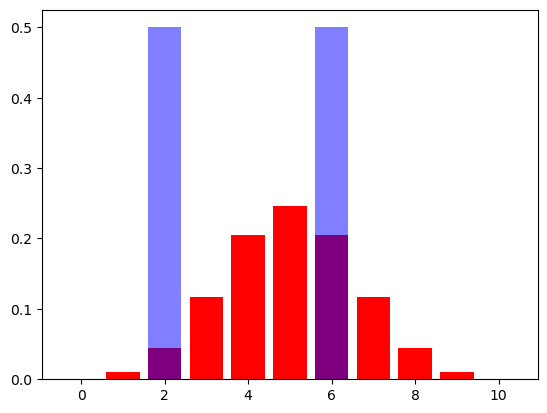

In [35]:
def plot_hist(num_trials, monedas, porciento):
    # valores posibles en cada lanzamiento de n monedas de que caigan en cara
    values = []
    arr = []

    # se genera el array de valores con el numero de monedas
    for n in range(monedas+1):
        values.append(n)

    # resultados teoricos del experimento
    distribucion_teorica = [binom(monedas, porciento).pmf(k) for k in values]

    # se hace el experimento num_trials veces
    for i in range(num_trials):
        arr.append(binomial(monedas, porciento))

    # se estandarizan los datos del experimento, poniendo 0's donde deben
    arrayDeConteo = np.unique(arr, return_counts=True)
    arrCompleto = list(set(np.hstack((values, arrayDeConteo[0]))))
    # resultados del experimento
    distribucion_simulada = verificacionArrays(arrCompleto,arrayDeConteo)
    
    # se grafica la distribucion teorica en rojo
    plt.bar(values, distribucion_teorica, label='teoría', color='red')

    # se grafica la distribucion teorica en azul
    plt.bar(values, distribucion_simulada, label = 'simulación', alpha = 0.5, color = 'blue')

    plt.show()

plot_hist(2,n,p)
#plot_hist(20,n,p)
#plot_hist(200,n,p)
#plot_hist(20000,n,p)
#plot_hist(200000,n,p)
#plot_hist(2000000,n,p)